In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-happiness/2015.csv
/kaggle/input/world-happiness/2017.csv
/kaggle/input/world-happiness/2019.csv
/kaggle/input/world-happiness/2018.csv
/kaggle/input/world-happiness/2016.csv


In [2]:
df_2015 = pd.read_csv('/kaggle/input/world-happiness/2015.csv')
df_2016 = pd.read_csv('/kaggle/input/world-happiness/2016.csv')
df_2017 = pd.read_csv('/kaggle/input/world-happiness/2017.csv')
df_2018 = pd.read_csv('/kaggle/input/world-happiness/2018.csv')
df_2019 = pd.read_csv('/kaggle/input/world-happiness/2019.csv')

print("T√ºm veri setleri ba≈üarƒ±yla y√ºklendi.")

# Her bir veri setinin s√ºtun isimlerini yazdƒ±ralƒ±m
print("\n--- 2015 S√ºtunlarƒ± ---")
print(df_2015.columns.tolist())

print("\n--- 2016 S√ºtunlarƒ± ---")
print(df_2016.columns.tolist())

print("\n--- 2017 S√ºtunlarƒ± ---")
print(df_2017.columns.tolist())

print("\n--- 2018 S√ºtunlarƒ± ---")
print(df_2018.columns.tolist())

print("\n--- 2019 S√ºtunlarƒ± ---")
print(df_2019.columns.tolist())

T√ºm veri setleri ba≈üarƒ±yla y√ºklendi.

--- 2015 S√ºtunlarƒ± ---
['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']

--- 2016 S√ºtunlarƒ± ---
['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']

--- 2017 S√ºtunlarƒ± ---
['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual']

--- 2018 S√ºtunlarƒ± ---
['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Gen

In [3]:
# Her yƒ±l i√ßin s√ºtun e≈üle≈ütirme ve yeniden adlandƒ±rma s√∂zl√ºkleri
# Amacƒ±mƒ±z hepsini a≈üaƒüƒ±daki ortak s√ºtunlara d√∂n√º≈üt√ºrmek:
# ['Country', 'Region', 'Happiness Rank', 'Happiness Score',
#  'GDP per Capita', 'Social Support', 'Life Expectancy',
#  'Freedom', 'Generosity', 'Perceptions of Corruption', 'Year']

# 2015 S√ºtunlarƒ±: ['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']
rename_2015 = {
    'Economy (GDP per Capita)': 'GDP per Capita',
    'Family': 'Social Support',
    'Health (Life Expectancy)': 'Life Expectancy',
    'Trust (Government Corruption)': 'Perceptions of Corruption'
}
# 2015 i√ßin sadece gerekli s√ºtunlarƒ± se√ßeceƒüiz
columns_2015 = ['Country', 'Region', 'Happiness Rank', 'Happiness Score',
                'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
                'Freedom', 'Trust (Government Corruption)', 'Generosity']

# 2016 S√ºtunlarƒ±: ['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']
rename_2016 = {
    'Economy (GDP per Capita)': 'GDP per Capita',
    'Family': 'Social Support',
    'Health (Life Expectancy)': 'Life Expectancy',
    'Trust (Government Corruption)': 'Perceptions of Corruption'
}
# 2016 i√ßin sadece gerekli s√ºtunlarƒ± se√ßeceƒüiz
columns_2016 = ['Country', 'Region', 'Happiness Rank', 'Happiness Score',
                'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
                'Freedom', 'Trust (Government Corruption)', 'Generosity']

# 2017 S√ºtunlarƒ±: ['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual']
rename_2017 = {
    'Happiness.Rank': 'Happiness Rank',
    'Happiness.Score': 'Happiness Score',
    'Economy..GDP.per.Capita.': 'GDP per Capita',
    'Family': 'Social Support',
    'Health..Life.Expectancy.': 'Life Expectancy',
    'Trust..Government.Corruption.': 'Perceptions of Corruption'
}
# 2017 i√ßin gerekli s√ºtunlarƒ± se√ßeceƒüiz. 'Region' s√ºtunu burada yok.
columns_2017 = ['Country', 'Happiness.Rank', 'Happiness.Score',
                'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.',
                'Freedom', 'Trust..Government.Corruption.', 'Generosity']


# 2018 S√ºtunlarƒ±: ['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
rename_2018 = {
    'Overall rank': 'Happiness Rank',
    'Country or region': 'Country',
    'Score': 'Happiness Score',
    'GDP per capita': 'GDP per Capita',
    'Social support': 'Social Support',
    'Healthy life expectancy': 'Life Expectancy',
    'Freedom to make life choices': 'Freedom',
    'Perceptions of corruption': 'Perceptions of Corruption'
}
# 2018 i√ßin gerekli s√ºtunlarƒ± se√ßeceƒüiz. 'Region' s√ºtunu burada da yok.
columns_2018 = ['Overall rank', 'Country or region', 'Score', 'GDP per capita',
                'Social support', 'Healthy life expectancy', 'Freedom to make life choices',
                'Generosity', 'Perceptions of corruption']

# 2019 S√ºtunlarƒ±: ['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
rename_2019 = {
    'Overall rank': 'Happiness Rank',
    'Country or region': 'Country',
    'Score': 'Happiness Score',
    'GDP per capita': 'GDP per Capita',
    'Social support': 'Social Support',
    'Healthy life expectancy': 'Life Expectancy',
    'Freedom to make life choices': 'Freedom',
    'Perceptions of corruption': 'Perceptions of Corruption'
}
# 2019 i√ßin gerekli s√ºtunlarƒ± se√ßeceƒüiz. 'Region' s√ºtunu burada da yok.
columns_2019 = ['Overall rank', 'Country or region', 'Score', 'GDP per capita',
                'Social support', 'Healthy life expectancy', 'Freedom to make life choices',
                'Generosity', 'Perceptions of corruption']


# Her bir DataFrame'i i≈üle
def process_dataframe(df, year, rename_map, select_columns):
    df_processed = df[select_columns].copy() # Sadece ilgili s√ºtunlarƒ± se√ß ve kopya olu≈ütur
    df_processed = df_processed.rename(columns=rename_map) # S√ºtunlarƒ± yeniden adlandƒ±r

    # 2017, 2018, 2019'da Region s√ºtunu yoksa ekleyip NaN ile doldur
    if 'Region' not in df_processed.columns:
        df_processed['Region'] = np.nan # NaN = Not a Number, bo≈ü deƒüerler i√ßin kullanƒ±rƒ±z

    df_processed['Year'] = year # Yƒ±l s√ºtununu ekle
    return df_processed


df_2015_processed = process_dataframe(df_2015, 2015, rename_2015, columns_2015)
df_2016_processed = process_dataframe(df_2016, 2016, rename_2016, columns_2016)
df_2017_processed = process_dataframe(df_2017, 2017, rename_2017, columns_2017)
df_2018_processed = process_dataframe(df_2018, 2018, rename_2018, columns_2018)
df_2019_processed = process_dataframe(df_2019, 2019, rename_2019, columns_2019)

# Birle≈ütirilmi≈ü DataFrame'i olu≈üturalƒ±m
# df_processed'larƒ±n t√ºm√ºn√ºn artƒ±k ortak s√ºtun adlarƒ±na sahip olmasƒ± gerekiyor
# ve Region s√ºtunu olmayanlar i√ßin NaN ile doldurulmu≈ü olmasƒ± gerekiyor
combined_df = pd.concat([df_2015_processed, df_2016_processed, df_2017_processed, df_2018_processed, df_2019_processed], ignore_index=True)

print("\n--- Birle≈ütirilmi≈ü Veri Seti (ƒ∞lk 5 Satƒ±r) ---")
print(combined_df.head())

print("\n--- Birle≈ütirilmi≈ü Veri Seti Bilgisi ---")
combined_df.info()

print("\n--- Birle≈ütirilmi≈ü Veri Seti Eksik Deƒüerler ---")
print(combined_df.isnull().sum())


--- Birle≈ütirilmi≈ü Veri Seti (ƒ∞lk 5 Satƒ±r) ---
       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   GDP per Capita  Social Support  Life Expectancy  Freedom  \
0         1.39651         1.34951          0.94143  0.66557   
1         1.30232         1.40223          0.94784  0.62877   
2         1.32548         1.36058          0.87464  0.64938   
3         1.45900         1.33095          0.88521  0.66973   
4         1.32629         1.32261          0.90563  0.63297   

   Perceptions of Corruption  Generosity  Year  
0                    0.41978     0.29678  2015  
1                    0.14145     0.43630  2015  
2                  

In [4]:
# 'Perceptions of Corruption' s√ºtunundaki eksik deƒüeri medyan ile dolduralƒ±m
# Medyanƒ± hesaplarken NaN deƒüerlerini hari√ß tutarƒ±z
median_corruption = combined_df['Perceptions of Corruption'].median()
combined_df['Perceptions of Corruption'].fillna(median_corruption, inplace=True)

# Eksik deƒüerleri tekrar kontrol edelim
print("\n--- Eksik Deƒüerler (Temizlendikten Sonra) ---")
print(combined_df.isnull().sum())


--- Eksik Deƒüerler (Temizlendikten Sonra) ---
Country                        0
Region                       467
Happiness Rank                 0
Happiness Score                0
GDP per Capita                 0
Social Support                 0
Life Expectancy                0
Freedom                        0
Perceptions of Corruption      0
Generosity                     0
Year                           0
dtype: int64


/tmp/ipykernel_13/1986892947.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df['Perceptions of Corruption'].fillna(median_corruption, inplace=True)



--- T√ºm Yƒ±llar Ortalamasƒ±na G√∂re En Mutlu 10 √úlke ---
Country
Denmark        7.5460
Norway         7.5410
Finland        7.5378
Switzerland    7.5114
Iceland        7.5110
Netherlands    7.4046
Canada         7.3506
Sweden         7.3192
New Zealand    7.3130
Australia      7.2762
Name: Happiness Score, dtype: float64


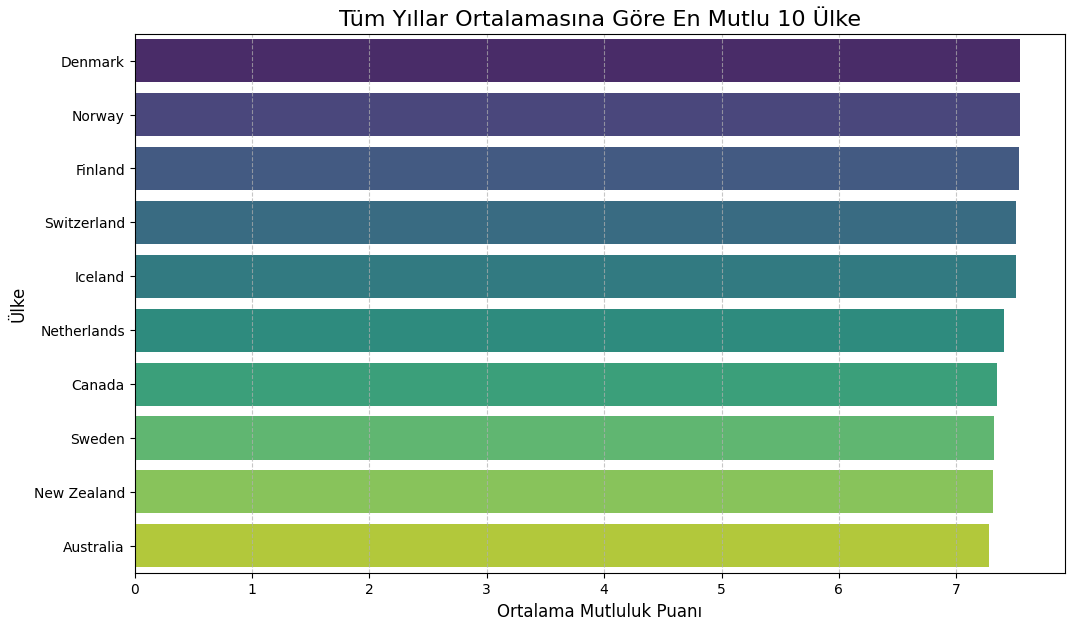

In [5]:
# Genel Mutluluk Skorunda En Y√ºksek √úlkeler
print("\n--- T√ºm Yƒ±llar Ortalamasƒ±na G√∂re En Mutlu 10 √úlke ---")
top_10_overall_happiness = combined_df.groupby('Country')['Happiness Score'].mean().sort_values(ascending=False).head(10)
print(top_10_overall_happiness)

# G√∂rselle≈ütirme: Genel Mutluluk Skorunda En Y√ºksek √úlkeler
plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_overall_happiness.values, y=top_10_overall_happiness.index, palette='viridis')
plt.title('T√ºm Yƒ±llar Ortalamasƒ±na G√∂re En Mutlu 10 √úlke', fontsize=16)
plt.xlabel('Ortalama Mutluluk Puanƒ±', fontsize=12)
plt.ylabel('√úlke', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

**G√∂zlem: ƒ∞lk 10'da 7 Batƒ± Avrupa √ºlkesi yer alƒ±yor.**


--- T√ºm Yƒ±llar Ortalamasƒ±na G√∂re Mutluluk Fakt√∂rlerinde En Y√ºksek Puanlƒ± √úlkeler ---

***** T√ºm Yƒ±llar Ortalamasƒ±na G√∂re 'GDP per Capita' ƒ∞√ßin En Y√ºksek 10 √úlke *****
Country
Qatar                      1.743691
United Arab Emirates       1.645227
Luxembourg                 1.637675
Singapore                  1.592138
Kuwait                     1.555662
Hong Kong S.A.R., China    1.551675
Norway                     1.519381
Switzerland                1.472164
Ireland                    1.460415
United States              1.455946
Name: GDP per Capita, dtype: float64


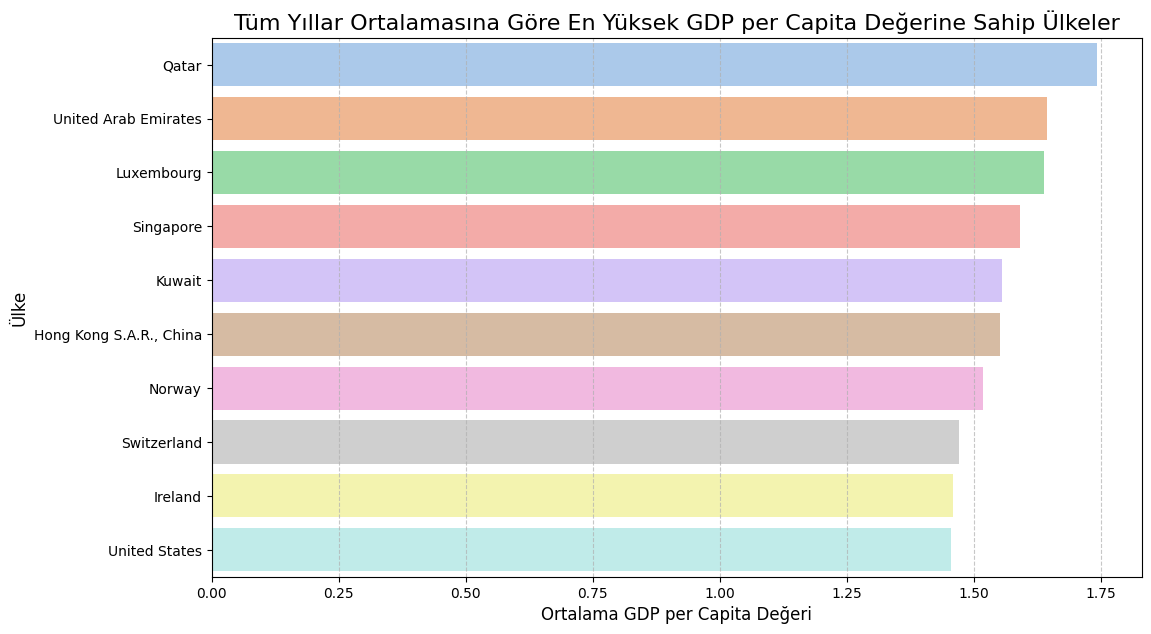


***** T√ºm Yƒ±llar Ortalamasƒ±na G√∂re 'Social Support' ƒ∞√ßin En Y√ºksek 10 √úlke *****
Country
Iceland              1.492813
Trinidad & Tobago    1.484500
Denmark              1.447688
Ireland              1.445056
New Zealand          1.439729
Finland              1.434429
Uzbekistan           1.434100
Norway               1.431075
Switzerland          1.417332
Australia            1.409006
Name: Social Support, dtype: float64


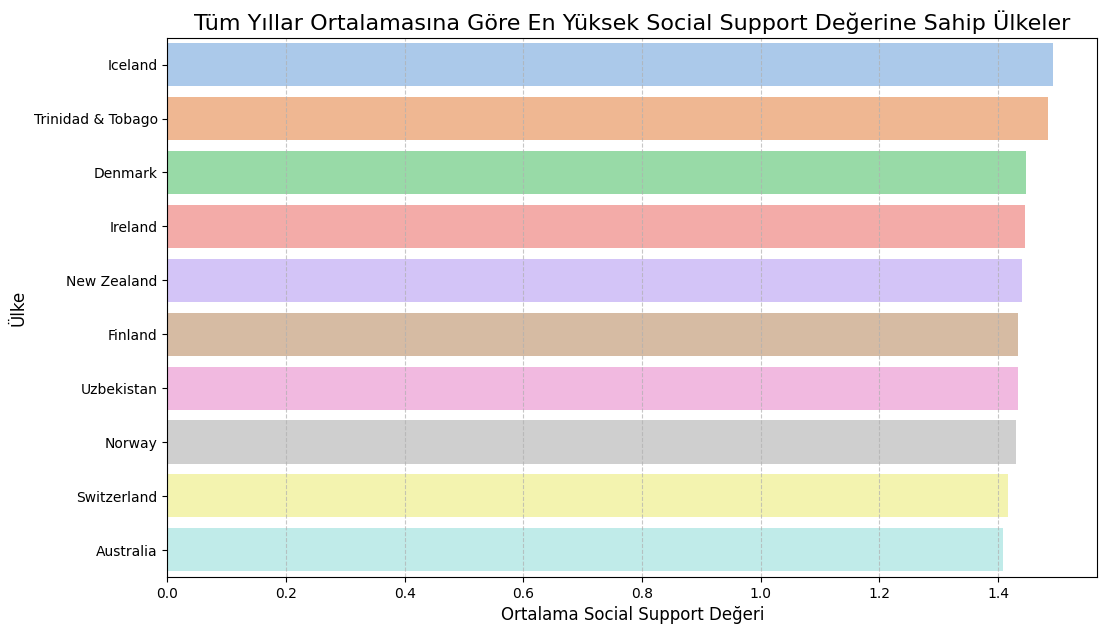


***** T√ºm Yƒ±llar Ortalamasƒ±na G√∂re 'Life Expectancy' ƒ∞√ßin En Y√ºksek 10 √úlke *****
Country
Hong Kong                  1.029513
Singapore                  1.014186
Japan                      0.979099
Northern Cyprus            0.975500
Spain                      0.950108
South Korea                0.948609
Hong Kong S.A.R., China    0.943062
Italy                      0.928725
Switzerland                0.928318
Iceland                    0.917744
Name: Life Expectancy, dtype: float64


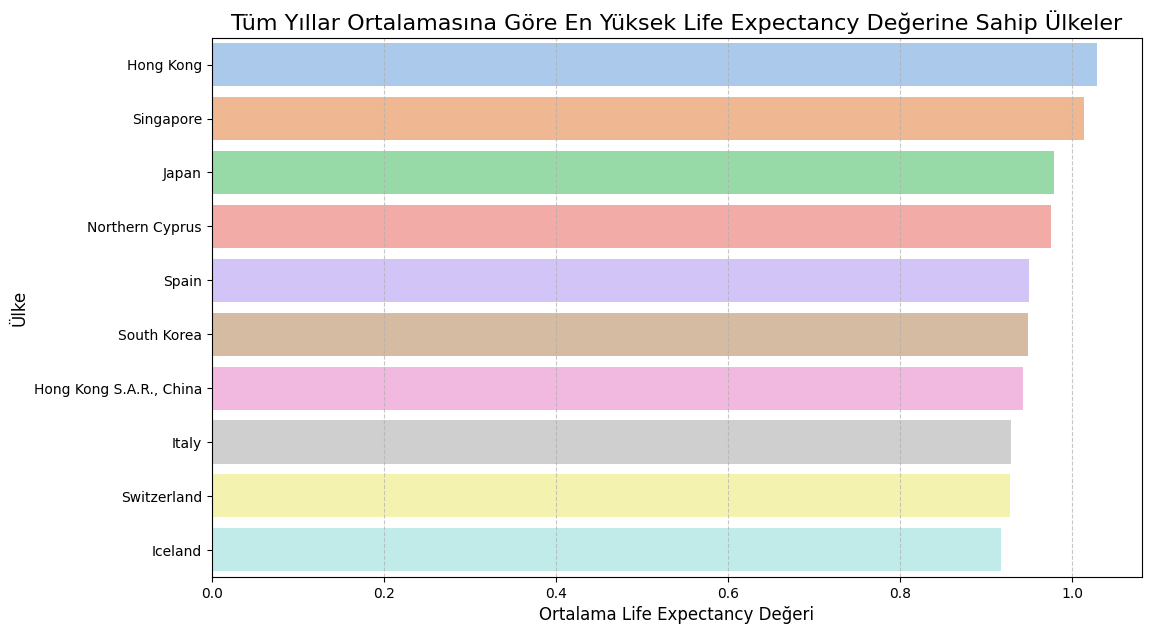


***** T√ºm Yƒ±llar Ortalamasƒ±na G√∂re 'Freedom' ƒ∞√ßin En Y√ºksek 10 √úlke *****
Country
Uzbekistan     0.655988
Norway         0.638049
Cambodia       0.637871
Oman           0.632740
Denmark        0.625959
Finland        0.621536
Switzerland    0.620642
Iceland        0.618035
New Zealand    0.617782
Sweden         0.617581
Name: Freedom, dtype: float64


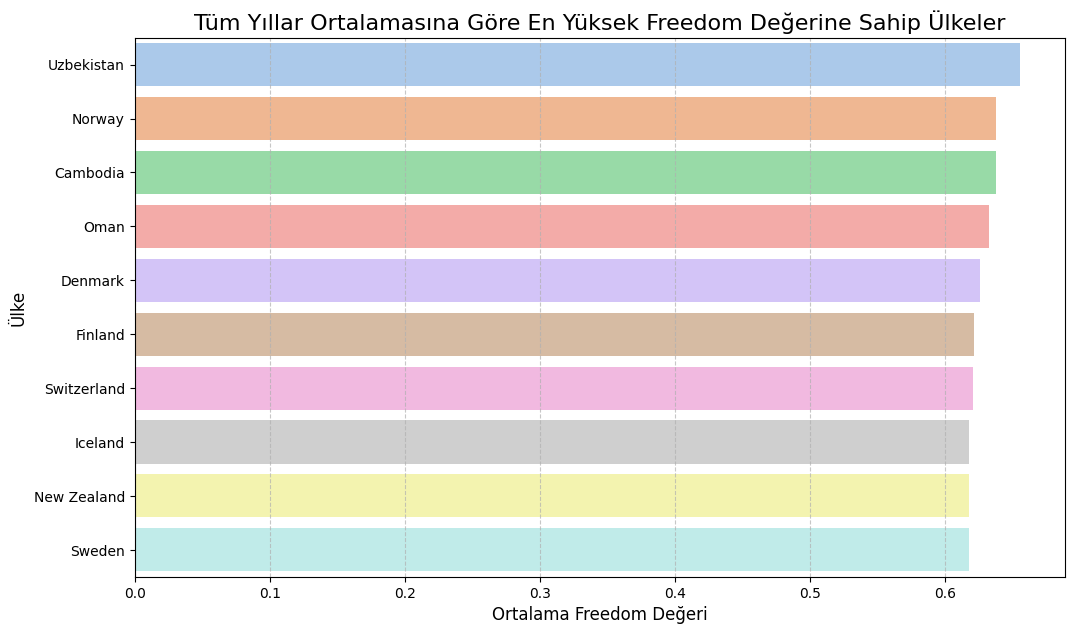


***** T√ºm Yƒ±llar Ortalamasƒ±na G√∂re 'Perceptions of Corruption' ƒ∞√ßin En Y√ºksek 10 √úlke *****
Country
Rwanda               0.473468
Singapore            0.467256
Denmark              0.429374
New Zealand          0.400015
Somaliland region    0.399280
Finland              0.398474
Sweden               0.397502
Switzerland          0.379763
Somaliland Region    0.367940
Qatar                0.355974
Name: Perceptions of Corruption, dtype: float64


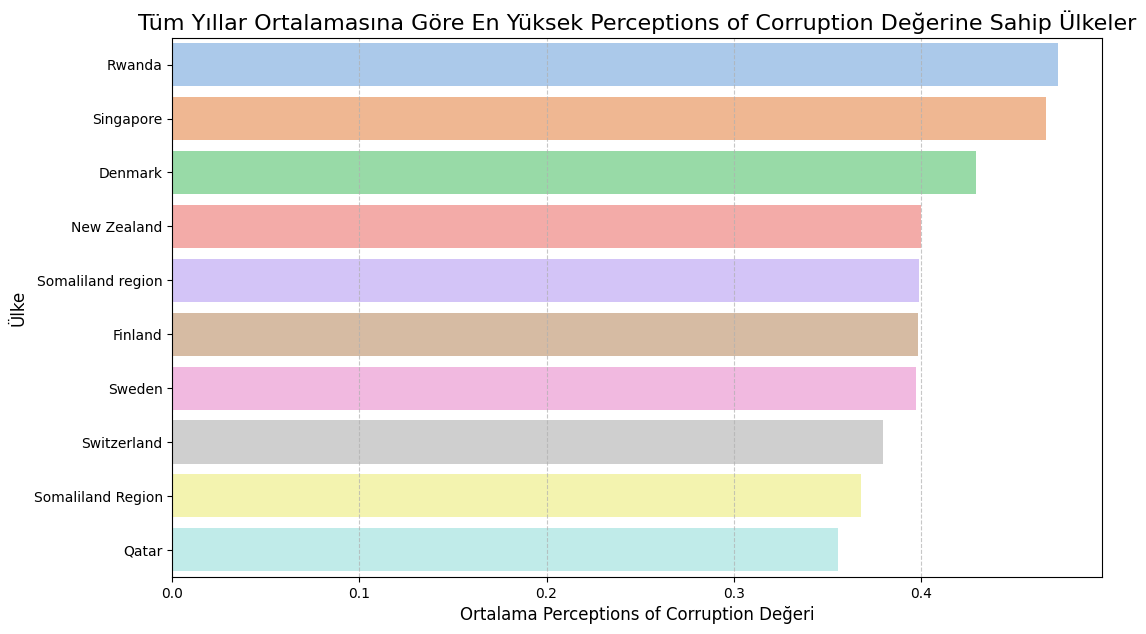


***** T√ºm Yƒ±llar Ortalamasƒ±na G√∂re 'Generosity' ƒ∞√ßin En Y√ºksek 10 √úlke *****
Country
Myanmar              0.723533
Indonesia            0.534853
Somaliland Region    0.514790
Somaliland region    0.503180
Thailand             0.491677
Malta                0.481124
Haiti                0.448331
Bhutan               0.434699
New Zealand          0.432805
Syria                0.431285
Name: Generosity, dtype: float64


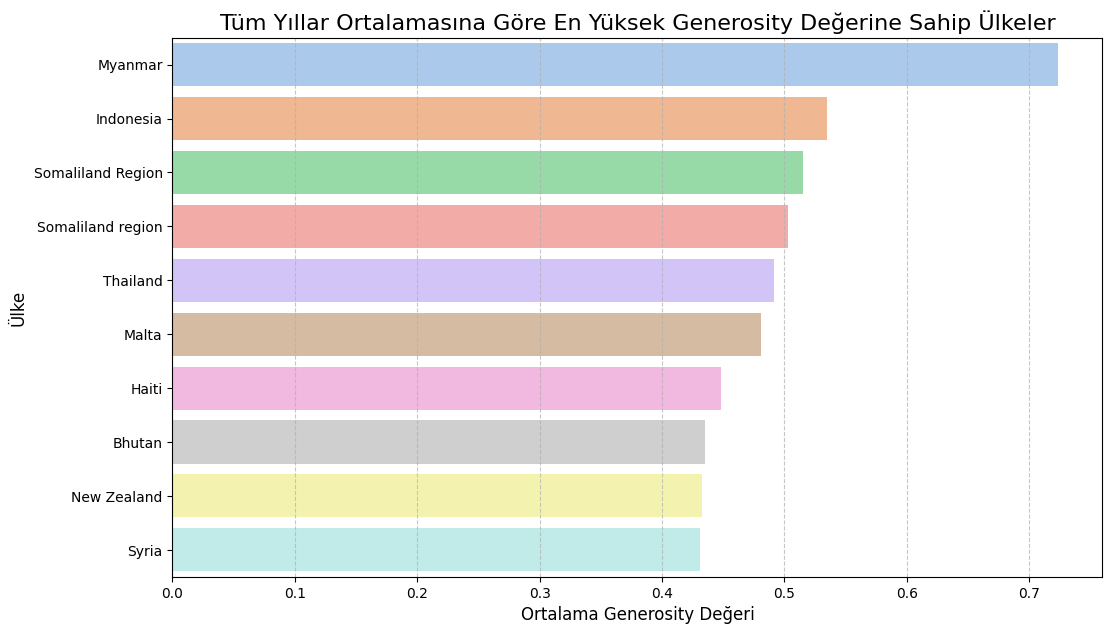

In [6]:
# Analiz edeceƒüimiz mutluluk fakt√∂rleri
happiness_factors = [
    'GDP per Capita',
    'Social Support',
    'Life Expectancy',
    'Freedom',
    'Perceptions of Corruption',
    'Generosity'
]

print("\n--- T√ºm Yƒ±llar Ortalamasƒ±na G√∂re Mutluluk Fakt√∂rlerinde En Y√ºksek Puanlƒ± √úlkeler ---")

# Her bir mutluluk fakt√∂r√º i√ßin analiz
for factor in happiness_factors:
    # √úlkelere g√∂re ortalama puanlarƒ± al ve sƒ±rala (En y√ºksek 10 √ºlke)
    avg_country_scores = combined_df.groupby('Country')[factor].mean().sort_values(ascending=False).head(10)

    print(f"\n***** T√ºm Yƒ±llar Ortalamasƒ±na G√∂re '{factor}' ƒ∞√ßin En Y√ºksek 10 √úlke *****")
    print(avg_country_scores)

    # G√∂rselle≈ütirme: √úlkelere g√∂re √ßubuk grafik
    plt.figure(figsize=(12, 7))
    sns.barplot(x=avg_country_scores.values, y=avg_country_scores.index, palette='pastel')
    plt.title(f'T√ºm Yƒ±llar Ortalamasƒ±na G√∂re En Y√ºksek {factor} Deƒüerine Sahip √úlkeler', fontsize=16)
    plt.xlabel(f'Ortalama {factor} Deƒüeri', fontsize=12)
    plt.ylabel('√úlke', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

***** B√∂lgelere G√∂re Ortalama Mutluluk Skoru *****
Region
Australia and New Zealand          7.304250
North America                      7.263500
Western Europe                     6.687643
Latin America and Caribbean        6.122283
Eastern Asia                       5.625167
Middle East and Northern Africa    5.396744
Central and Eastern Europe         5.351810
Southeastern Asia                  5.328167
Southern Asia                      4.572071
Sub-Saharan Africa                 4.170462
Name: Happiness Score, dtype: float64


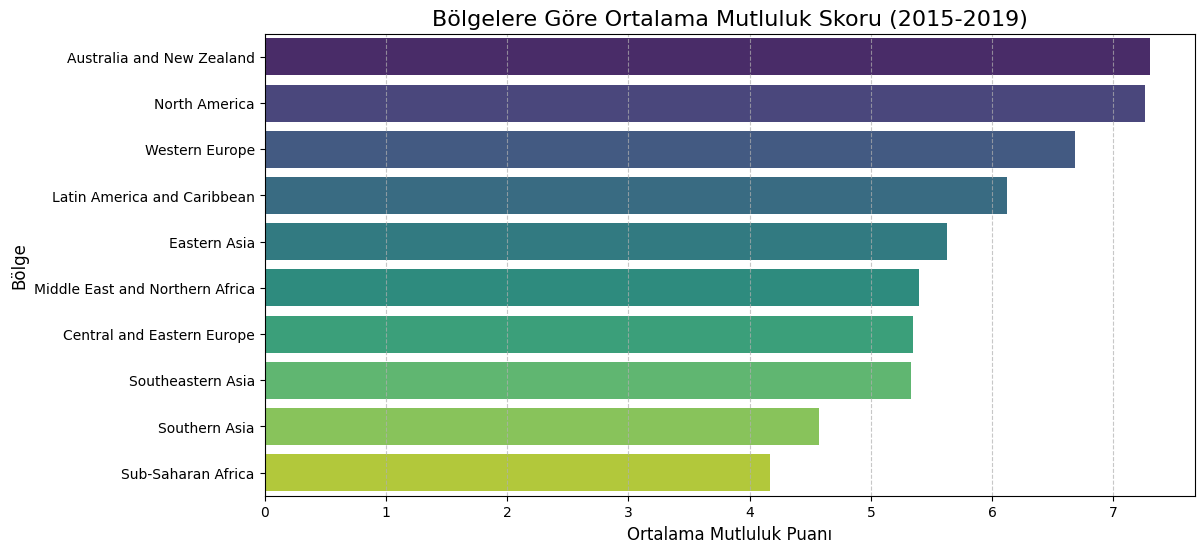

In [7]:
# B√∂lgelerin ortalama mutluluk skorunu hesapla ve sƒ±rala
regional_happiness = combined_df.groupby('Region')['Happiness Score'].mean().sort_values(ascending=False)
print("***** B√∂lgelere G√∂re Ortalama Mutluluk Skoru *****")
print(regional_happiness)

# G√∂rselle≈ütirme
plt.figure(figsize=(12, 6))
sns.barplot(x=regional_happiness.values, y=regional_happiness.index, palette='viridis')
plt.title('B√∂lgelere G√∂re Ortalama Mutluluk Skoru (2015-2019)', fontsize=16)
plt.xlabel('Ortalama Mutluluk Puanƒ±', fontsize=12)
plt.ylabel('B√∂lge', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [8]:
factors = ['GDP per Capita', 'Social Support', 'Life Expectancy', 'Freedom', 'Perceptions of Corruption', 'Generosity']

for factor in factors:
    # B√∂lgesel ortalamalar
    regional_avg = combined_df.groupby('Region')[factor].mean().sort_values(ascending=False)
    
    # Her b√∂lgede en y√ºksek puan alan √ºlke
    top_country_per_region = combined_df.loc[combined_df.groupby('Region')[factor].idxmax()][['Region', 'Country', factor]]
    
    print(f"\n***** {factor} ƒ∞√ßin B√∂lgesel Liderler *****")
    print(f"**B√∂lge Ortalamalarƒ±:**\n{regional_avg.head(3)}")
    print(f"\n**Her B√∂lgenin En Y√ºksek Puanlƒ± √úlkesi:**\n{top_country_per_region.sort_values(by=factor, ascending=False).head(5)}")


***** GDP per Capita ƒ∞√ßin B√∂lgesel Liderler *****
**B√∂lge Ortalamalarƒ±:**
Region
North America                1.417228
Western Europe               1.357826
Australia and New Zealand    1.347212
Name: GDP per Capita, dtype: float64

**Her B√∂lgenin En Y√ºksek Puanlƒ± √úlkesi:**
                              Region        Country  GDP per Capita
193  Middle East and Northern Africa          Qatar         1.82427
177                   Western Europe     Luxembourg         1.69752
179                Southeastern Asia      Singapore         1.64555
232                     Eastern Asia      Hong Kong         1.51070
170                    North America  United States         1.50796

***** Social Support ƒ∞√ßin B√∂lgesel Liderler *****
**B√∂lge Ortalamalarƒ±:**
Region
Australia and New Zealand    1.226610
North America                1.178410
Western Europe               1.144877
Name: Social Support, dtype: float64

**Her B√∂lgenin En Y√ºksek Puanlƒ± √úlkesi:**
                      

/tmp/ipykernel_13/2552027780.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combined_df,
/tmp/ipykernel_13/2552027780.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combined_df,
/tmp/ipykernel_13/2552027780.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combined_df,
/tmp/ipykernel_13/2552027780.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combined_df,
/tmp/ipykernel_13/2552027780.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combined_df,
/tmp/ipykernel_13/2552027780.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combined_df,


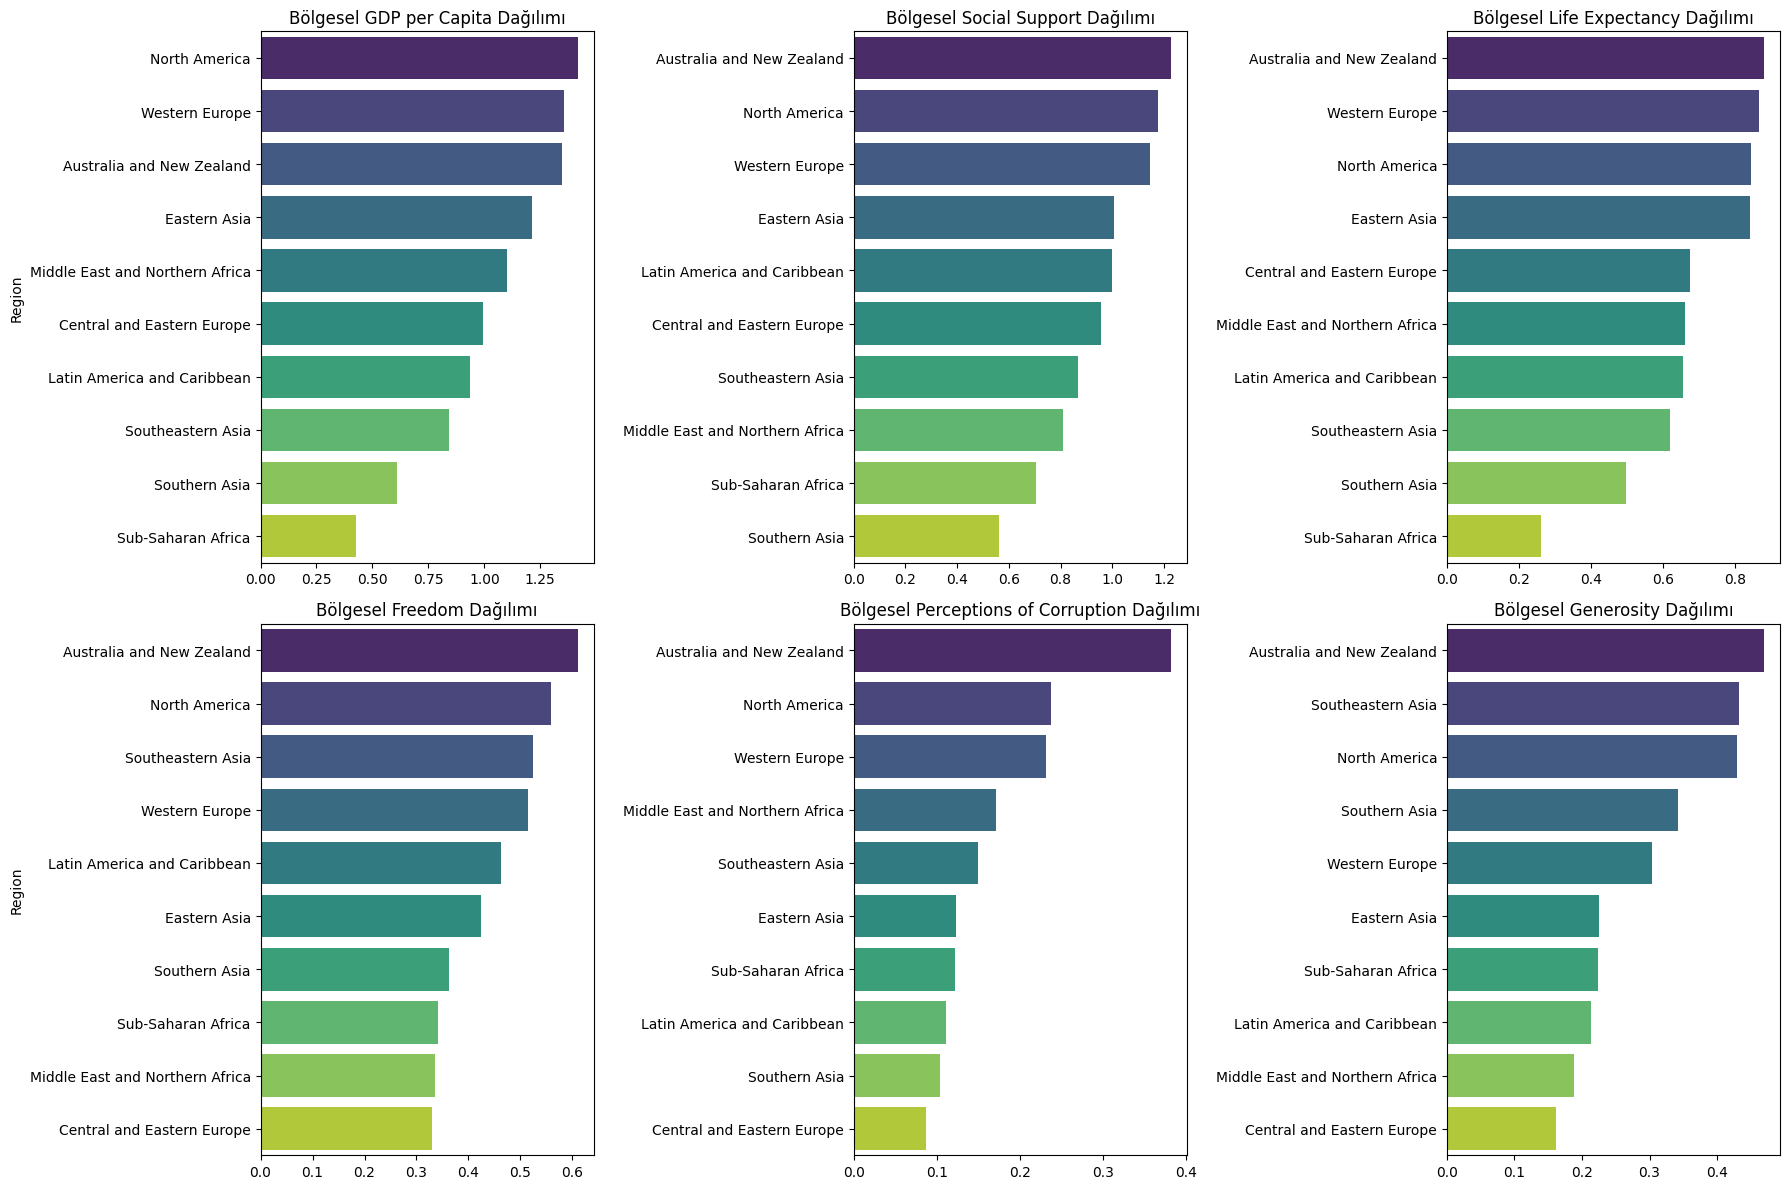

In [9]:

plt.figure(figsize=(18, 12))

for i, factor in enumerate(happiness_factors, 1):
    plt.subplot(2, 3, i)
    
    # B√∂lgesel ortalamalarƒ± hesapla ve sƒ±rala
    region_order = combined_df.groupby('Region')[factor].mean().sort_values(ascending=False).index
    
    sns.barplot(data=combined_df,
                x=factor,
                y='Region',
                order=region_order,
                ci=None,
                palette='viridis')
    
    plt.title(f'B√∂lgesel {factor} Daƒüƒ±lƒ±mƒ±', fontsize=12)
    plt.xlabel('')
    if i not in [1,4]: plt.ylabel('')  # Sadece sol taraftaki grafiklerde y-ekseni etiketi

plt.tight_layout()
plt.show()


## üåç Genel Mutluluk Sƒ±ralamasƒ±

### üèÜ En Mutlu 10 √úlke
| Sƒ±ra | √úlke       | B√∂lge                  | Mutluluk Skoru |
|------|------------|------------------------|----------------|
| 1    | Danimarka  | Western Europe         | 7.546          |
| 2    | Norve√ß     | Western Europe         | 7.541          |
| 3    | Finlandiya | Western Europe         | 7.538          |
| 4    | ƒ∞svi√ßre    | Western Europe         | 7.511          |
| 5    | ƒ∞zlanda    | Western Europe         | 7.511          |
| 6    | Hollanda   | Western Europe         | 7.405          |
| 7    | Kanada     | North America          | 7.351          |
| 8    | ƒ∞sve√ß      | Western Europe         | 7.319          |
| 9    | Y.Zelanda  | Australia and NZ       | 7.313          |
| 10   | Avustralya | Australia and NZ       | 7.276          |

**G√∂zlem:** ƒ∞lk 10'da 7 Batƒ± Avrupa √ºlkesi yer alƒ±yor.


## üìä Fakt√∂r Bazlƒ± Liderler

### üí∞ GDP per Capita (Ekonomik Refah)
**Top 3 √úlke:**
1. Katar (1.744)
2. UAE (1.645) 
3. L√ºksemburg (1.638)

**B√∂lgesel Liderler:**
- Middle East: Katar
- Western Europe: L√ºksemburg
- Southeastern Asia: Singapur

**Analiz:** Petrol zengini √ºlkeler ekonomik refahta a√ßƒ±k ara √∂nde.

### ü§ù Social Support (Sosyal Destek)
**Top 3 √úlke:**
1. ƒ∞zlanda (1.493)
2. Trinidad (1.485)
3. Danimarka (1.448)

**B√∂lgesel Liderler:** 
- Western Europe: ƒ∞zlanda
- Latin America: Paraguay
- Australia/NZ: Y.Zelanda


### üè• Life Expectancy (Ya≈üam Beklentisi)
**Top 3 √úlke:**
1. Hong Kong (1.030)
2. Singapur (1.014)  
3. Japonya (0.979)

**B√∂lgesel Liderler:**
- Eastern Asia: Hong Kong
- Western Europe: ƒ∞spanya
- Middle East: ƒ∞srail


### üïäÔ∏è Freedom (√ñzg√ºrl√ºk)
**Top 3 √úlke:**
1. √ñzbekistan (0.656)
2. Norve√ß (0.638)
3. Kambo√ßya (0.638)

**B√∂lgesel Liderler:**
- Western Europe: Norve√ß
- Southeastern Asia: Kambo√ßya  
- Central Asia: √ñzbekistan


### üö´ Perceptions of Corruption
**Top 3 √úlke:**
1. Ruanda (0.473)
2. Singapur (0.467)
3. Danimarka (0.429)

**B√∂lgesel Liderler:**
- Sub-Saharan Africa: Ruanda
- Southeastern Asia: Singapur
- Western Europe: Danimarka


### üíù Generosity (C√∂mertlik)
**Top 3 √úlke:**
1. Myanmar (0.724)
2. Endonezya (0.535)
3. Somaliland (0.515)

**B√∂lgesel Liderler:**
- Southeastern Asia: Myanmar
- Western Europe: Malta  
- Sub-Saharan Africa: Somaliland

**K√ºlt√ºrel Etki:** ƒ∞lk 10'da 7 Asya √ºlkesi.



=== 2015-2016 D√∂nemi √ñnemli Deƒüi≈üimler ===

Mutluluk Puanƒ± En √áok Artanlar:
         Score_Change_2015_2016
Algeria                   0.750
Togo                      0.464
Latvia                    0.462
Romania                   0.404
Hungary                   0.345

Mutluluk Puanƒ± En √áok Azalanlar:
           Score_Change_2015_2016
Liberia                    -0.949
Venezuela                  -0.726
Haiti                      -0.490
Zimbabwe                   -0.417
Sudan                      -0.411

Sƒ±ralamada En √áok Y√ºkselenler:
           Rank_Change_2015_2016
Algeria                       30
Latvia                        21
Cameroon                      19
Sri Lanka                     15
Romania                       15

Sƒ±ralamada En √áok D√º≈üenler:
           Rank_Change_2015_2016
Liberia                      -34
Nigeria                      -25
Vietnam                      -21
Zambia                       -21
Venezuela                    -21

=== 2016-2017 D√∂nem

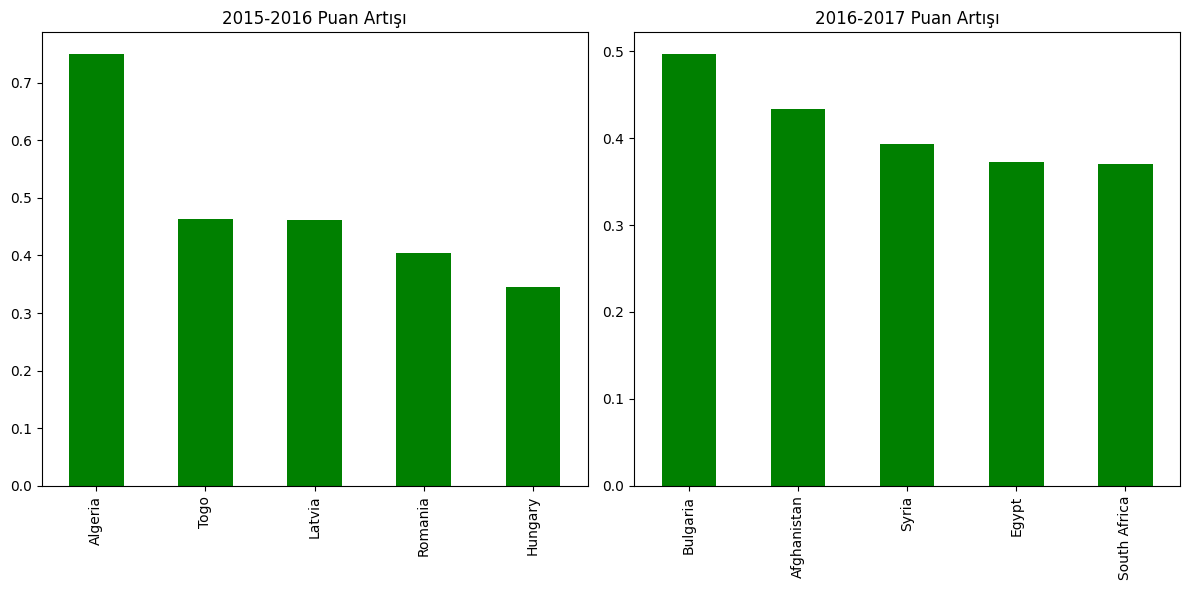

In [10]:
# 2015-2016 ve 2016-2017 kar≈üƒ±la≈ütƒ±rmasƒ± i√ßin
def compare_years(df, year1, year2):
    # Belirtilen yƒ±llara ait veriyi filtrele
    df_year1 = df[df['Year'] == year1].set_index('Country')
    df_year2 = df[df['Year'] == year2].set_index('Country')

    # Ortak √ºlkeleri bul
    common_countries = list(set(df_year1.index) & set(df_year2.index))

    # Deƒüi≈üimleri hesapla
    changes = pd.DataFrame(index=common_countries)
    changes[f'Score_Change_{year1}_{year2}'] = df_year2.loc[common_countries, 'Happiness Score'] - df_year1.loc[common_countries, 'Happiness Score']
    changes[f'Rank_Change_{year1}_{year2}'] = df_year1.loc[common_countries, 'Happiness Rank'] - df_year2.loc[common_countries, 'Happiness Rank']

    return changes

# 2015-2016 ve 2016-2017 deƒüi≈üimleri
changes_2015_2016 = compare_years(combined_df, 2015, 2016)
changes_2016_2017 = compare_years(combined_df, 2016, 2017)

# En √ßok deƒüi≈üim g√∂steren √ºlkeleri bulma
def get_extreme_changes(changes, year1, year2, n=5):
    return {
        'Max_Score_Increase': changes.nlargest(n, f'Score_Change_{year1}_{year2}'),
        'Max_Score_Decrease': changes.nsmallest(n, f'Score_Change_{year1}_{year2}'),
        'Max_Rank_Improvement': changes.nlargest(n, f'Rank_Change_{year1}_{year2}'),
        'Max_Rank_Decline': changes.nsmallest(n, f'Rank_Change_{year1}_{year2}')
    }

# Sonu√ßlarƒ± al
results_2015_2016 = get_extreme_changes(changes_2015_2016, 2015, 2016)
results_2016_2017 = get_extreme_changes(changes_2016_2017, 2016, 2017)

# Sonu√ßlarƒ± g√ºzelce g√∂sterme
def print_changes(results, year1, year2):
    print(f"\n=== {year1}-{year2} D√∂nemi √ñnemli Deƒüi≈üimler ===")

    print("\nMutluluk Puanƒ± En √áok Artanlar:")
    print(results['Max_Score_Increase'].iloc[:, 0].to_frame())

    print("\nMutluluk Puanƒ± En √áok Azalanlar:")
    print(results['Max_Score_Decrease'].iloc[:, 0].to_frame())

    print("\nSƒ±ralamada En √áok Y√ºkselenler:")
    print(results['Max_Rank_Improvement'].iloc[:, 1].to_frame())

    print("\nSƒ±ralamada En √áok D√º≈üenler:")
    print(results['Max_Rank_Decline'].iloc[:, 1].to_frame())

# Sonu√ßlarƒ± yazdƒ±r
print_changes(results_2015_2016, 2015, 2016)
print_changes(results_2016_2017, 2016, 2017)

# G√∂rselle≈ütirme
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
results_2015_2016['Max_Score_Increase'].iloc[:, 0].plot(kind='bar', color='green', title='2015-2016 Puan Artƒ±≈üƒ±')
plt.subplot(1, 2, 2)
results_2016_2017['Max_Score_Increase'].iloc[:, 0].plot(kind='bar', color='green', title='2016-2017 Puan Artƒ±≈üƒ±')
plt.tight_layout()
plt.show()

**2015'ten 2016'ya Mutluluk Puanƒ± ve Sƒ±ralama Deƒüi≈üimi**
* 2015'ten 2016'ya ge√ßi≈üte mutluluk puanƒ±nda en b√ºy√ºk artƒ±≈üƒ± g√∂steren √ºlkeler arasƒ±nda Cezayir (Algeria) dikkat √ßekmektedir, puanƒ±nda 0.750'lik √∂nemli bir artƒ±≈ü ya≈üamƒ±≈ütƒ±r. Onu Togo, Letonya, Romanya ve Macaristan gibi √ºlkeler takip etmektedir. Bu √ºlkelerdeki artƒ±≈ülar, muhtemelen o d√∂nemde ya≈üanan i√ß veya dƒ±≈ü olumlu geli≈ümeler, ekonomik iyile≈ümeler veya sosyal reformlarla ili≈ükilendirilebilir.
* Aynƒ± d√∂nemde mutluluk puanƒ±nda en b√ºy√ºk azalƒ±≈ülarƒ± ya≈üayan √ºlkeler arasƒ±nda Liberya (-0.949) ve Venezuela (-0.726) √∂ne √ßƒ±kmaktadƒ±r. Liberya ve Venezuela'daki bu keskin d√º≈ü√º≈üler, b√ºy√ºk olasƒ±lƒ±kla siyasi istikrarsƒ±zlƒ±k, ekonomik krizler veya toplumsal sorunlarla baƒülantƒ±lƒ±dƒ±r. Haiti, Zimbabve ve Sudan da benzer ≈üekilde kayda deƒüer d√º≈ü√º≈üler ya≈üamƒ±≈ütƒ±r.
* Sƒ±ralamada en √ßok y√ºkselen √ºlkelerin ba≈üƒ±nda Cezayir (30 sƒ±ra) gelmektedir, bu da puanƒ±ndaki artƒ±≈üla tutarlƒ±dƒ±r. Letonya, Kamerun, Romanya ve Mƒ±sƒ±r da mutluluk sƒ±ralamasƒ±nda √∂nemli sƒ±√ßramalar yapmƒ±≈ütƒ±r. Bu, nispeten daha az mutlu √ºlkelerin genel sƒ±ralamada daha √ºst basamaklara tƒ±rmandƒ±ƒüƒ±nƒ± g√∂stermektedir.
* Sƒ±ralamada en √ßok d√º≈ü√º≈ü ya≈üayan √ºlkeler arasƒ±nda Liberya (-34 sƒ±ra) ba≈üƒ± √ßekmektedir. Nijerya, Vietnam, Venezuela ve Zambiya da bu d√∂nemde sƒ±ralamada √∂nemli kayƒ±plar ya≈üamƒ±≈ütƒ±r. Bu d√º≈ü√º≈üler, ilgili √ºlkelerde ya≈üam kalitesini veya toplumsal refahƒ± olumsuz etkileyen olaylarƒ±n bir yansƒ±masƒ± olabilir.
**2016'dan 2017'ye Mutluluk Puanƒ± ve Sƒ±ralama Deƒüi≈üimi**
* 2016'dan 2017'ye mutluluk puanƒ±nda en b√ºy√ºk artƒ±≈üƒ± ya≈üayan √ºlkelerin ba≈üƒ±nda Bulgaristan (0.497) gelmektedir. Afganistan ve Suriye gibi √ßatƒ±≈üma b√∂lgelerindeki √ºlkelerde dahi puan artƒ±≈ülarƒ± g√∂r√ºlmesi (ki bu durum, √∂nceki d√∂nemlerdeki √ßok d√º≈ü√ºk seviyelerden k√º√ß√ºk bir toparlanma veya veri toplama metodolojisindeki farklƒ±lƒ±klarla a√ßƒ±klanabilir), dikkat √ßekicidir. Mƒ±sƒ±r ve G√ºney Afrika da bu d√∂nemde √∂nemli iyile≈ümeler kaydetmi≈ütir.
* 2016'dan 2017'ye mutluluk puanƒ±nda en b√ºy√ºk azalƒ±≈üƒ± g√∂steren √ºlke yine Venezuela (-0.834) olmu≈ütur, bu da √ºlkedeki krizin derinle≈ütiƒüini g√∂stermektedir. √ñnceki d√∂nemde √∂nemli artƒ±≈ü kaydeden Cezayir'in bu d√∂nemde kayda deƒüer bir d√º≈ü√º≈ü ya≈üamasƒ± dikkat √ßekicidir. Haiti, Zimbabve ve Tanzanya da mutluluk puanlarƒ±nda √∂nemli kayƒ±plar ya≈üamƒ±≈ütƒ±r.
* Sƒ±ralamada en √ßok y√ºkselen √ºlkeler arasƒ±nda Bulgaristan (24 sƒ±ra) liderdir, bu da puan artƒ±≈üƒ±yla paralellik g√∂stermektedir. Mƒ±sƒ±r, Gabon, Macaristan ve G√ºney Afrika da bu d√∂nemde mutluluk sƒ±ralamasƒ±nda √∂nemli ilerlemeler kaydetmi≈ütir.
* Sƒ±ralamada en √ßok d√º≈ü√º≈ü ya≈üayan √ºlke yine Venezuela (-38 sƒ±ra) olmu≈ütur, bu da puanƒ±ndaki d√º≈ü√º≈üle tutarlƒ±dƒ±r. Somali, Cezayir, Butan ve Kƒ±rgƒ±zistan da bu d√∂nemde mutluluk sƒ±ralamasƒ±nda √∂nemli kayƒ±plar ya≈üamƒ±≈ütƒ±r. √ñzellikle Cezayir'in bir √∂nceki yƒ±lki artƒ±≈üƒ±n ardƒ±ndan d√º≈ü√º≈ü ya≈üamasƒ±, mutluluk dinamiklerinin ne kadar deƒüi≈üken olabileceƒüini g√∂stermektedir.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

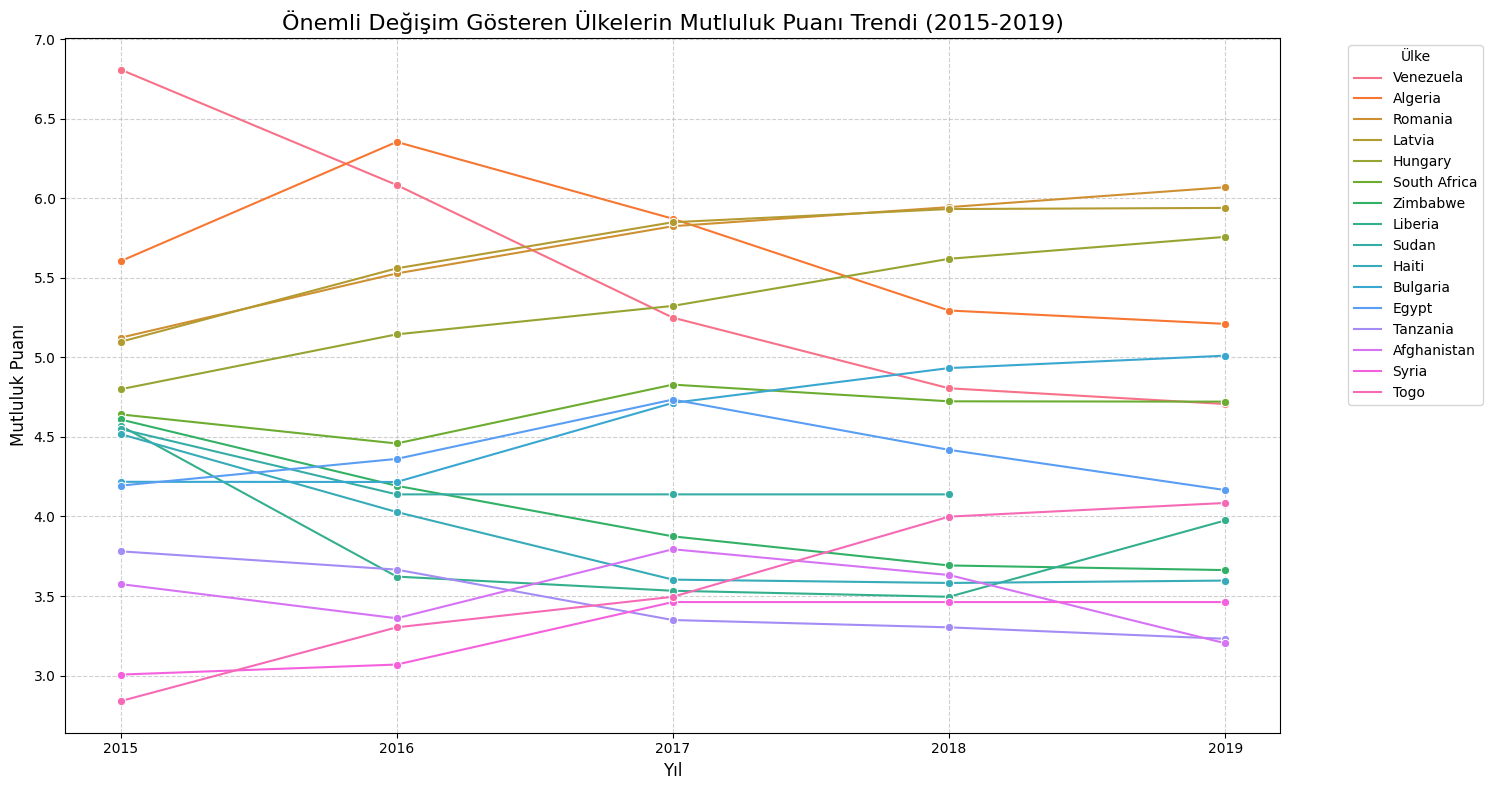

In [11]:
# Yƒ±llar i√ßindeki mutluluk puanƒ± deƒüi≈üimini √ßizgi grafiƒüi ile g√∂rselle≈ütirme

# En √ßok puan artƒ±≈üƒ± ve azalƒ±≈üƒ± g√∂steren √ºlkeleri alalƒ±m (hem 2015-2016 hem de 2016-2017 i√ßin)
top_increase_countries_2015_2016 = results_2015_2016['Max_Score_Increase'].index.tolist()
top_decrease_countries_2015_2016 = results_2015_2016['Max_Score_Decrease'].index.tolist()
top_increase_countries_2016_2017 = results_2016_2017['Max_Score_Increase'].index.tolist()
top_decrease_countries_2016_2017 = results_2016_2017['Max_Score_Decrease'].index.tolist()

# T√ºm bu √ºlkelerin listesini olu≈üturalƒ±m
countries_to_plot = list(set(top_increase_countries_2015_2016 + top_decrease_countries_2015_2016 +
                             top_increase_countries_2016_2017 + top_decrease_countries_2016_2017))

# Sadece bu √ºlkelere ait veriyi filtrele
df_plot = combined_df[combined_df['Country'].isin(countries_to_plot)]

# G√∂rselle≈ütirme
plt.figure(figsize=(15, 8))

sns.lineplot(data=df_plot, x='Year', y='Happiness Score', hue='Country', marker='o')

plt.title('√ñnemli Deƒüi≈üim G√∂steren √úlkelerin Mutluluk Puanƒ± Trendi (2015-2019)', fontsize=16)
plt.xlabel('Yƒ±l', fontsize=12)
plt.ylabel('Mutluluk Puanƒ±', fontsize=12)
plt.xticks(df_plot['Year'].unique()) # Yƒ±l etiketlerini tam g√∂ster
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='√úlke', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()